In [71]:
# Import packages
from pyschedule import Scenario, solvers, plotters, alt
import pandas as pd
import numpy as np
%matplotlib inline
import time

In [2]:
price_spot = pd.read_excel("/home/celine/Downloads/prix_spot.xlsx")
price_spot.head()

,heure,2019-03-10 00:00:00,2019-03-11 00:00:00,2019-03-12 00:00:00,2019-03-13 00:00:00,2019-03-14 00:00:00,2019-03-15 00:00:00,2019-03-16 00:00:00
0,0,17.67,23.64,40.98,26.85,28.14,26.71,24.16
1,1,18.49,22.71,38.97,22.28,26.86,18.89,11.44
2,2,17.95,24.97,36.91,25.33,25.88,16.56,8.34
3,3,9.91,19.06,35.00,11.78,24.32,12.12,6.49
4,4,6.54,20.55,32.92,14.61,23.72,16.68,8.40


* Scenario:
    * ```schedule_cost``` : provide some positive or negative reward if a task is scheduled

* Resource: 
    * ```cost_per_period``` :Using a resource for some periods might imply additional resource cost
    
* Tasks: 
    * 
    ``` # create 5 tasks of the same type with length 1 and delay cost 1
    T = S.Tasks('T',num=5,length=1,delay_cost=1) ```

In [94]:
# Generate random data for individuals behavior

individuals = list((range(10)))
forecast_period = 1 # number of days forecasted with the given tasks
hours = list(range(forecast_period*24))

list_tasks= ['washing_machine', 'dish_washer']
dico_tasks= {'washing_machine':2, 'dish_washer':3}

# Time slot for off-peak hours
beginning_slot = 9
end_slot = 18

# Numbers of tasks asked for the individual i for the next 24h
tasks = np.random.randint(2, size= len(individuals))
requirement_tasks = {}
for i in individuals: 
    requirement_tasks[i] = tasks[i]

In [114]:
requirement_tasks

{0: 0, 1: 1, 2: 0, 3: 0, 4: 1, 5: 0, 6: 1, 7: 1, 8: 0, 9: 1}

In [113]:
S = Scenario('individual', horizon= len(hours))

# Create individuals as resources indexed by name
resources = {name: S.Resource(str(name)) for name in individuals}

# Create tasks : number of tasks for each day for each individual
# Could add the name of the task with list_tasks
tasks = {}
for h in hours: 
    if h in requirement_tasks.

Exception: ERROR: name S_0_ 0 contains one of the following characters: -+[] ->/

In [92]:
for h in requirement_tasks: 
    print(type(h))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [89]:
for h in requirement_tasks:
    if h in hours:
        print("h")
    else: 
        print("nothing")

nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing


In [63]:
# Distribute each tasks in the days 
for name_task, day in tasks:
#     for i in [beginning_slot, end_slot, ]
    S += tasks[name_task, day] >= day 
#     S += tasks[day, t] >= beginning_slot + day, tasks[day, t] <= end_slot + day
    # Group the tasks (washing_machine, dish_washer) as there are no order to do it
    # !! Not true for washing_machine and dryer
    tasks[name_task, day].group = day

In [64]:
# No restrictions on resources : any task can be done with any resource
for name_task, day in tasks: 
    tasks[name_task, day] += alt(S.resources())

In [ ]:
time_limit = 10 # time limit for each run
repeats = 5 # repeated random runs because CBC might get stuck

In [ ]:
# Iteratively add shift requests until no solution exists
for name, hour in requested_tasks:
    S += resources[name][hour] >= 1
    for i in range(repeats):
        random_seed = random.randint(0,10000)
        start_time = time.time()
        status = solvers.mip.solve(S,kind='CBC',time_limit=time_limit,
                                   random_seed=random_seed,msg=0)
        # Break when solution found
        if status:
            break
    print(name,hour,'compute time:', time.time()-start_time)
    # Break if all computed solution runs fail
    if not status:
        S -= resources[name][hour] >= 1
        print('cant fit last shift request')

# Plot the last computed solution
%matplotlib inline
plotters.matplotlib.plot(S,fig_size=(12,5))


In [66]:
# Solve and plot scenario
if solvers.mip.solve(S,kind='CBC',msg=1,random_seed=6):
    %matplotlib inline
    plotters.matplotlib.plot(S,fig_size=(30,10))
else:
    print('no solution found')


INFO: execution time for solving mip (sec) = 0.25664401054382324
ERROR: no solution found
no solution found


In [ ]:
S

INFO: execution time for solving mip (sec) = 0.024211406707763672
INFO: objective = -5.5
[(dish_washer, R2, 9, 12), (washing_machine, R1, 9, 11)]


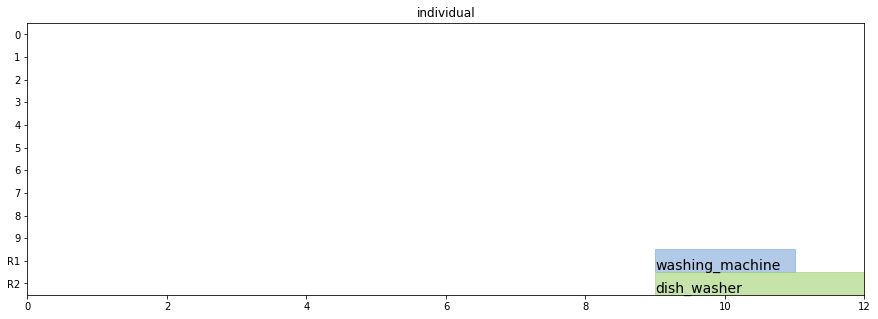

In [50]:
# Task 'washing machine' has a length of 2 
WM = S.Task('washing_machine', length=2, num=1, schedule_cost= -2.5)
DW = S.Task('dish_washer', length= 3, num= 1, schedule_cost= -3)

# Resources : electricity units ?
R1 = S.Resource('R1')
R2 = S.Resource('R2')


# Define that task T requires resource R 
WM += R1
DW += R2

# add the constraints that T needs to get schedule after period 1 but before 5
S += WM > beginning_slot, WM < end_slot
S += DW > beginning_slot, DW < end_slot

solvers.mip.solve(S,msg=1)
print(S.solution())
plotters.matplotlib.plot(S)

```
INFO: execution time for solving mip (sec) = 0.015182256698608398
INFO: objective = 0.0
[(washing_machine, R, 16, 18)]
```

> The washing machine need to be schedule from 16 to 18